In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv('udata.txt', sep='\t',names=['user_id','item_id','rating','timestamp'])
df = pd.read_csv('/Users/leechenhsin/Desktop/python/rec/udata.txt',sep='\t',names=['user_id','item_id','rating','timestamp'])
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
movie_titles = pd.read_csv('/Users/leechenhsin/Desktop/python/Recommend/Movie_Id_Titles',sep=',',names=['item_id','title'])
movie_titles.head()

df = pd.merge(df, movie_titles, on='item_id')
df.head()

df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


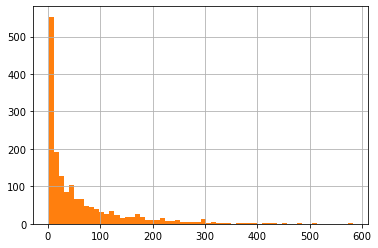

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline
ratings['rating'].hist(bins=50) #電影評分

ratings['number_of_ratings'].hist(bins=60) #電影評分數

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


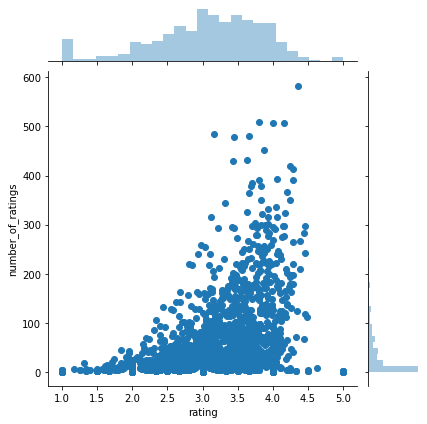

In [10]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)  

movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix.head()  #畫pivot table

In [11]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

star_user_rating = movie_matrix['Star Wars (1977)']

In [12]:
AFO_user_rating.head()
contact_user_rating.head()


user_id
1    5.0
2    3.0
3    2.0
4    5.0
5    NaN
Name: Contact (1997), dtype: float64

In [13]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating) #相關係數

similar_to_air_force_one.head()

similar_to_contact = movie_matrix.corrwith(contact_user_rating)

similar_to_contact.head()

title
'Til There Was You (1997)    0.904534
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.108441
12 Angry Men (1957)          0.022265
187 (1997)                   0.135512
dtype: float64

In [14]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
'Til There Was You (1997),0.867722
101 Dalmatians (1996),0.221943
12 Angry Men (1957),0.228031
187 (1997),0.294232
2 Days in the Valley (1996),0.043847


In [15]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])
corr_AFO .head()
corr_contact.head()

corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)


,Correlation,number_of_ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
Sneakers (1992),0.377275,150
"Firm, The (1993)",0.376987,151
Arsenic and Old Lace (1944),0.373759,115
Outbreak (1995),0.358015,104


In [16]:
#接下來匯入KMeans函式庫
from sklearn.cluster import KMeans

#請KMeans分成三類
clf = KMeans(n_clusters=5)
print(clf)

clf.fit(ratings)

#取得預測結果
clf.labels_

KMeans(n_clusters=5)


array([0, 0, 4, ..., 0, 0, 0], dtype=int32)

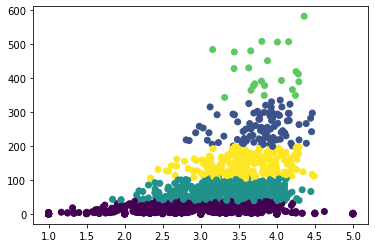

In [17]:
#最後畫出來看看
#分成三類
plt.scatter(ratings['rating'],ratings['number_of_ratings'], c=clf.labels_)

df = pd.DataFrame()
df["rating"] = ratings['rating']
df["number_of_ratings"] = ratings['number_of_ratings']
df["label"] = clf.labels_
df.head()


df.to_csv('movie_kmeans.csv', index=True)